<a href="https://colab.research.google.com/github/diegogcorso/Projetos-Pessoais/blob/master/Controle_de_fluxo_de_bicicletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Os dados são de um contador automatizado de bicicletas, instalado em 2012, que possui sensores indutivos nas calçadas leste e oeste de uma ponte.

Dados retirados do Kagle, para inicar a análise.
Primeiro importamos os dados e depois fazemos a tradução das colunas para português, além de inserir uma coluna com o totalizados de biciletas naquele horário.

In [7]:
import pandas as pd
data = pd.read_csv('fremont-bridge.csv', index_col = 'Date', parse_dates=['Date'])
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [8]:
data.columns = ["Oeste", "Leste"]
data["Total"] = data["Oeste"] + data["Leste"]
data.head()

,Oeste,Leste,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Oeste   45976 non-null  float64
 1   Leste   45976 non-null  float64
 2   Total   45976 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


Importamos uma biblioteca para plotar os gráficos com as informações de contagem de horários das bicicletas

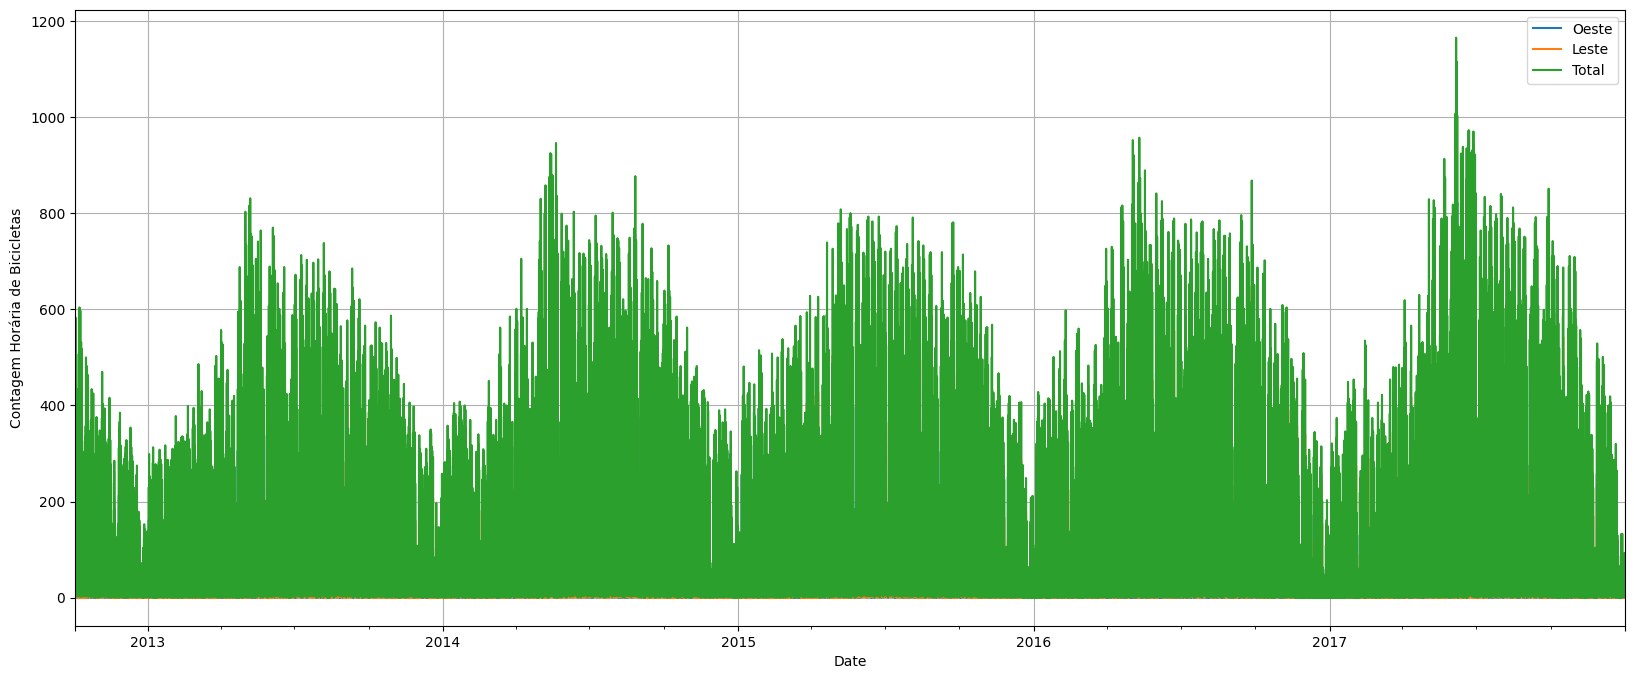

In [15]:
import matplotlib.pyplot as plt
data.plot(figsize=(20,8))
plt.grid()
plt.legend(loc='best')
plt.ylabel("Contagem Horária de Bicicletas")
plt.show()

Verificamos os valores ausentes e fazemos o tratamento desses dados. Trazendo as informações como media, desvio padrão etc sem eles

In [16]:
data.isnull().sum()*100/len(data)

Oeste    0.017397
Leste    0.017397
Total    0.017397
dtype: float64

In [17]:
data.dropna().describe()

,Oeste,Leste,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


Agora Utilizando a biblioteca seaborn, que será mais completa para a nossa análise

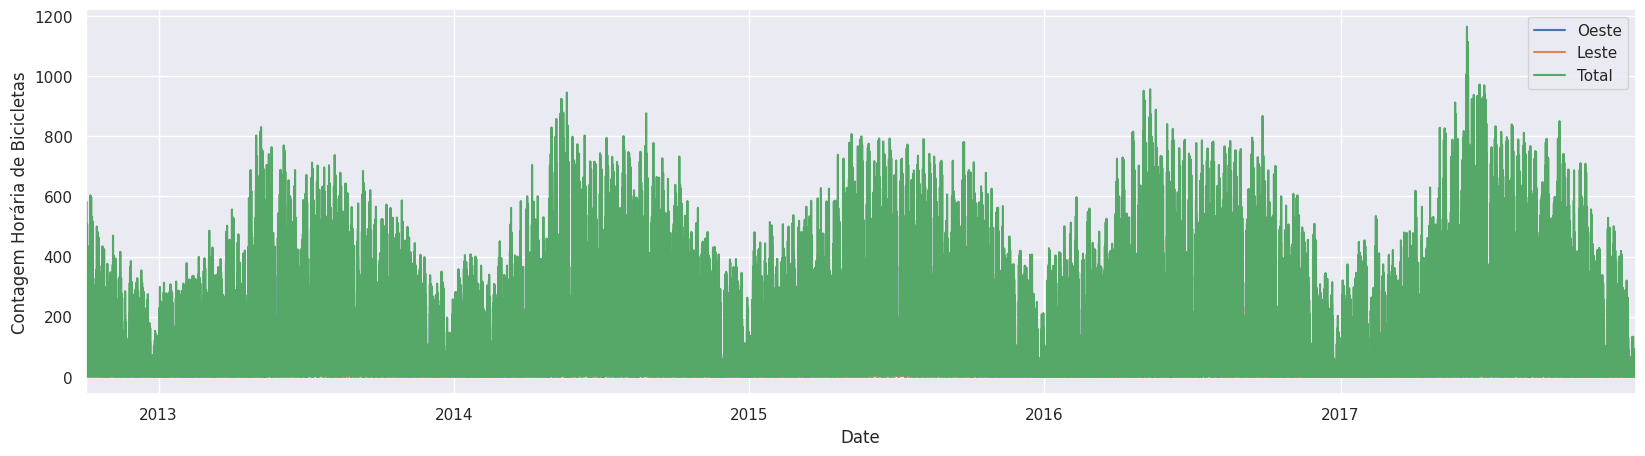

In [18]:
import seaborn
seaborn.set()
data.plot(figsize=(20,5))
plt.ylabel("Contagem Horária de Bicicletas")
plt.show()

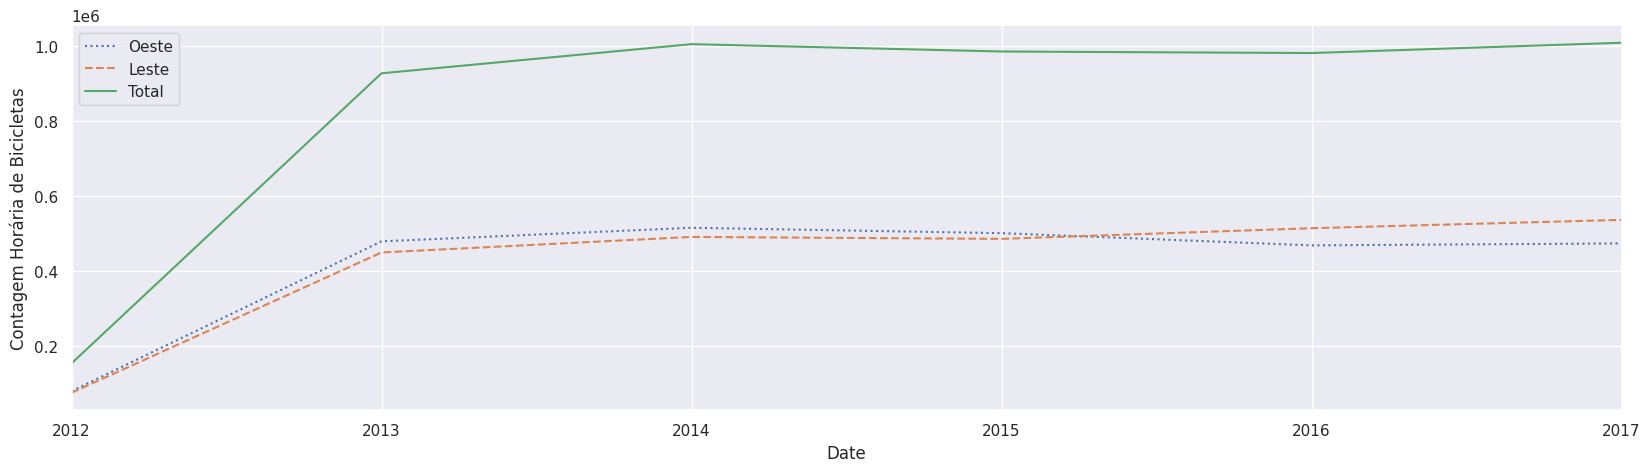

In [19]:
yearly = data.resample("Y").sum()
yearly.plot(style=[':', '--', '-'],figsize=(20,5))
plt.ylabel('Contagem Anual de Bicicletas')
plt.show()

As 25 mil amostras horárias são densas demais para entender. Então vamos mostrar uma grade mais facil de entender, utilizando a amostra semanal

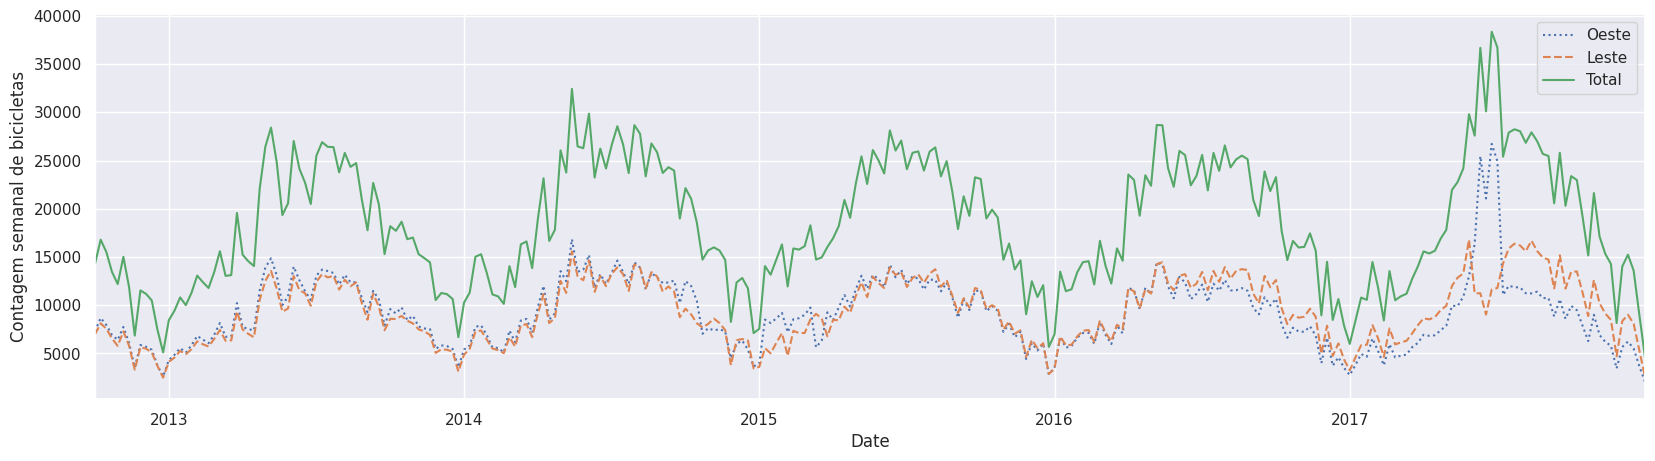

In [20]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'],figsize=(20,5))
plt.ylabel('Contagem semanal de bicicletas')
plt.show()

Mais uma forma útil de agregar os dados usando a média movel e a função pd.rolling_mean().
Aqui faremos uma média contínua dos dados de 30 dias, usando win_type gaussiano.

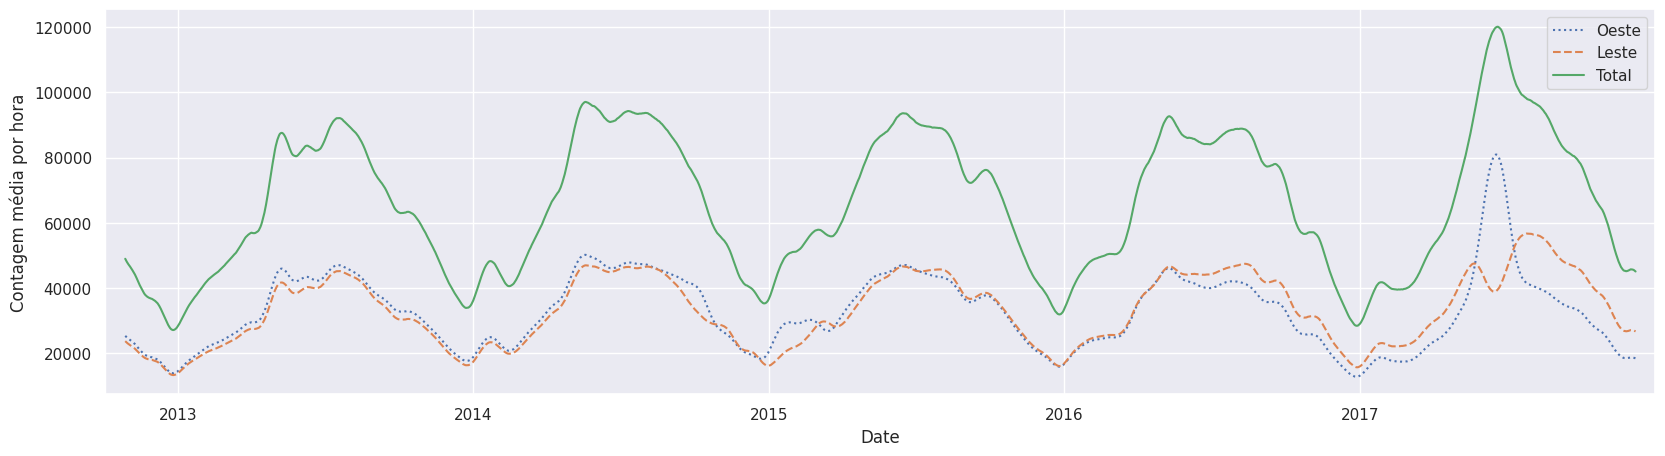

In [40]:
daily = data.resample('D').sum()
daily.rolling(30, center=True, win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'],figsize=(20,5))
plt.ylabel('Contagem média por hora')
plt.show()

Agora para investigar o tráfego médio em cada hora do dia, para ver a tendência geral dos dados, utilizando a função GroupBy

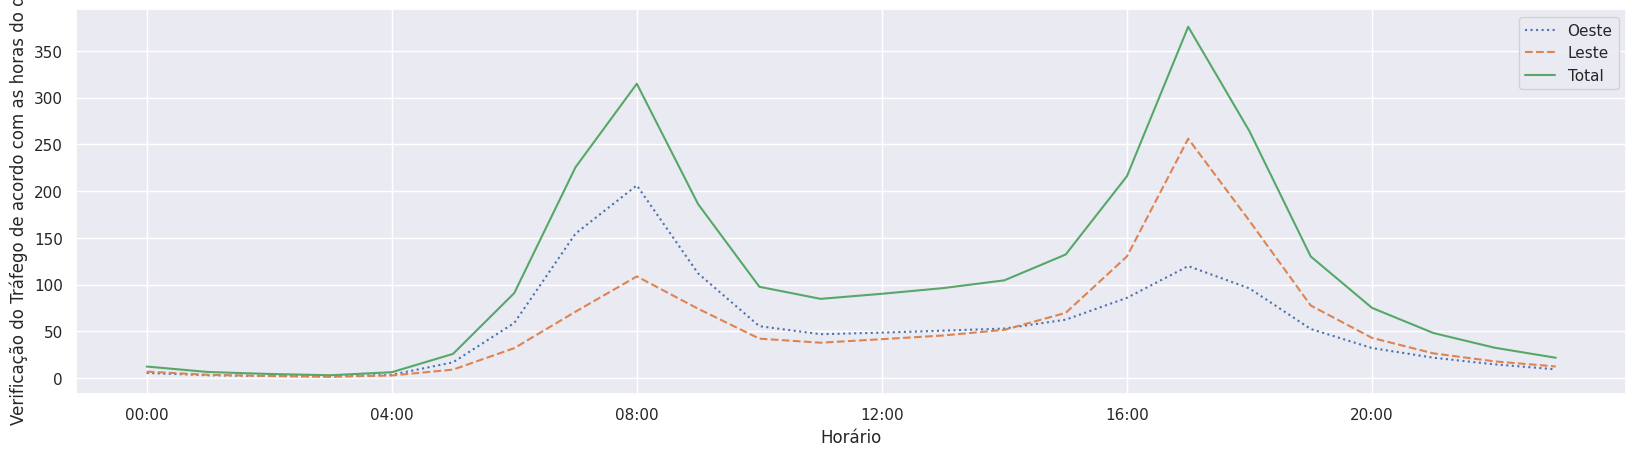

In [42]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'],figsize=(20,5))
plt.ylabel("Verificação do Tráfego de acordo com as horas do dia")
plt.xlabel("Horário")
plt.show()